# **Gym Occupancy Prediction using Machine Learning**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score


import warnings
import random
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

random.seed(1111)

Clone repo

In [2]:
!git clone https://github.com/new2me321/webscraper.git
%cd webscraper/
!ls

Cloning into 'webscraper'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 52 (delta 18), reused 38 (delta 9), pack-reused 0
Unpacking objects: 100% (52/52), 128.77 KiB | 3.30 MiB/s, done.
/content/webscraper
gymdata.csv  images  README.md	test1.csv  webscraper.py


## data prepocessing

In [3]:
df = pd.read_csv('gymdata.csv')
df.head()

df["Time"] = pd.to_datetime(df["Time"])

# Extract the date and time parts of the "Time" column
df["date"] = df["Time"].dt.strftime("%Y-%m-%d")
df["time"] = df["Time"].dt.strftime("%H:%M:%S")

# convert to pandas types
df["date"]  = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

# Convert to the format 'HH.MM'
df["time"] = (df["time"].dt.strftime("%H.%M")).astype(float)

# Extract the day, month, and year from date
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# remove the unnecessary columns
# df.drop("date", axis=1, inplace=True)
df.drop("Time", axis=1, inplace=True)
df['day_of_week'] = df['date'].dt.dayofweek

df.head(100)

,Name,Percentage,date,time,day,month,year,day_of_week
0,Lemon Gym Mustakivi,9,2023-01-02,1.35,2,1,2023,0
1,Lemon Gym Tartu,8,2023-01-02,1.35,2,1,2023,0
2,Lemon Gym Mustakivi,9,2023-01-02,2.00,2,1,2023,0
3,Lemon Gym Tartu,8,2023-01-02,2.00,2,1,2023,0
4,Lemon Gym Mustakivi,9,2023-01-02,2.30,2,1,2023,0
...,...,...,...,...,...,...,...,...
95,Lemon Gym Tartu,9,2023-01-03,1.00,3,1,2023,1
96,Lemon Gym Mustakivi,9,2023-01-03,1.30,3,1,2023,1
97,Lemon Gym Tartu,9,2023-01-03,1.30,3,1,2023,1
98,Lemon Gym Mustakivi,9,2023-01-03,2.00,3,1,2023,1


In [4]:
df.dtypes

Name                   object
Percentage              int64
date           datetime64[ns]
time                  float64
day                     int64
month                   int64
year                    int64
day_of_week             int64
dtype: object

In [5]:
df_tartu = df[df["Name"] == "Lemon Gym Tartu"]

# reset the index
df_tartu = df_tartu.reset_index()

print(len(df_tartu))

df_tartu.head()

1326


,index,Name,Percentage,date,time,day,month,year,day_of_week
0,1,Lemon Gym Tartu,8,2023-01-02,1.35,2,1,2023,0
1,3,Lemon Gym Tartu,8,2023-01-02,2.00,2,1,2023,0
2,5,Lemon Gym Tartu,8,2023-01-02,2.30,2,1,2023,0
3,7,Lemon Gym Tartu,8,2023-01-02,3.00,2,1,2023,0
4,9,Lemon Gym Tartu,8,2023-01-02,3.30,2,1,2023,0


## Visualization

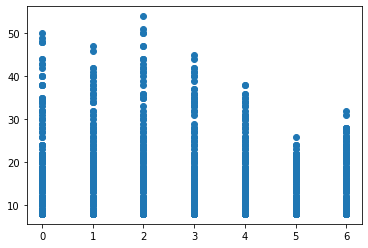

In [6]:
plt.scatter(df_tartu['day_of_week'], df_tartu['Percentage'])

## Predicting

In [7]:
X = df_tartu[['time', 'day_of_week']]
y = df_tartu[['Percentage']]

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [8]:
# KNearest
knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train, y_train)

# Linear Regression 
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)

# Logistic Regression
logr = LogisticRegression()
logr = logr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier( criterion='entropy')
rf = rf.fit(X_train, y_train)

# Support Vector Machines
svm = SVC()
svm = svm.fit(X_train, y_train)

In [9]:
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_logr = logr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [10]:
print("KNN results", y_pred_knn)
print("LR results", np.round(y_pred_lr).astype(int))
print("DT results", y_pred_dt)
print("LogR results", y_pred_logr)
print("RF results", y_pred_rf)
print("SVM results", y_pred_svm)

print("Original labels", y_test)


KNN results [21 18 35 34  8  8 10  8 20  8 19 16 16 14  8 17 30  9 18 16  8  8 17 16
 18  8 16  8  9  9  9 14  9 32  8 28  8  9 30  8  8  8 21 13 17 16 40  8
  9  8 17  8 22  8 31  9 31 16 10 29 10 21 16  8 14 16 18 20 35 12 22  9
 11 14 10 10  9 20 19 37 11 16 12 17 15  8 31  8 10 22 21  9 17 22 10 20
  9 16 12  8 14 17 14 17 25  8 26 12 17 23 10  8  8 28  8  9 21 27  8 17
  8 12 11 48 16 17 29 43  8 16 13  9 16 12 30 20 19  9  8 26 18 21  8 12
  8 27  8 19 16 31  9 18 17 32 19  9 19  9 26 17 20 44 40 30  8 18  8  8
 11 10 12 17  8  8 10 16 19 16 12  8  8 19 11 10 22 17 20 16 42 16 17 18
 20  9  9  9 18  8  8 12  8 16 12  8 12 20 28 16 12 26 30 20 11 10 15 18
  9 16  8 16  8 16  8 17 30 13 22  9 12 16  8 22  8  8 16  8 17 10 27 16
 17 10 12 40 12  8  8  9  8 18 14  8  8 23 14 19 15 12  9 13 18 14 20 22
  8 17]
LR results [23 27 22 24  8 11 24 12 22  9 24 17 16 27 12 29 23 10 29 16 12 12 22 24
 26 15 24 10 11 11  8 14 11 27  9 24 13  7 20  9 11 12 21 14 18 16 26 11
  9  7 18 11 23  8 2

In [11]:
print("--------------------KNN----------------------")
print("Model accuracy", accuracy_score(y_test, y_pred_knn))
print("RMSE", mean_squared_error(y_test, y_pred_knn, squared=False))


print("--------------------L.Regression----------------------")
print("RMSE", mean_squared_error(y_test, y_pred_lr, squared=False))

print("--------------------DT----------------------")
print("Model accuracy", accuracy_score(y_test, y_pred_dt))
print("RMSE", mean_squared_error(y_test, y_pred_dt, squared=False))


print("--------------------LogRegression----------------------")
print("RMSE", mean_squared_error(y_test, y_pred_logr, squared=False))

print("--------------------RF----------------------")
print("Model accuracy", accuracy_score(y_test, y_pred_rf))
print("RMSE", mean_squared_error(y_test, y_pred_rf, squared=False))

print("--------------------SVM----------------------")
print("Model accuracy", accuracy_score(y_test, y_pred_svm))
print("RMSE", mean_squared_error(y_test, y_pred_svm, squared=False))



--------------------KNN----------------------
Model accuracy 0.30451127819548873
RMSE 3.7915616636979625
--------------------L.Regression----------------------
RMSE 6.201687639177153
--------------------DT----------------------
Model accuracy 0.2631578947368421
RMSE 3.4641016151377544
--------------------LogRegression----------------------
RMSE 8.074139540737963
--------------------RF----------------------
Model accuracy 0.2518796992481203
RMSE 3.4253587705183404
--------------------SVM----------------------
Model accuracy 0.2744360902255639
RMSE 5.541029463808778


Select the best model from the above results

In [12]:
model = rf

y_pred = model.predict(X)

print("Model accuracy", accuracy_score(y, y_pred))
print("MSE", mean_squared_error(y, y_pred, squared=False))
# # insert predictions to df
df_tartu.insert(loc=2, column='Percent_pred', value=y_pred)

Model accuracy 0.46304675716440424
MSE 2.9968560700633784


In [13]:
df_tartu

,index,Name,Percent_pred,Percentage,date,time,day,month,year,day_of_week
0,1,Lemon Gym Tartu,8,8,2023-01-02,1.35,2,1,2023,0
1,3,Lemon Gym Tartu,8,8,2023-01-02,2.00,2,1,2023,0
2,5,Lemon Gym Tartu,8,8,2023-01-02,2.30,2,1,2023,0
3,7,Lemon Gym Tartu,8,8,2023-01-02,3.00,2,1,2023,0
4,9,Lemon Gym Tartu,8,8,2023-01-02,3.30,2,1,2023,0
...,...,...,...,...,...,...,...,...,...,...
1321,2643,Lemon Gym Tartu,17,14,2023-01-29,21.30,29,1,2023,6
1322,2645,Lemon Gym Tartu,16,14,2023-01-29,22.00,29,1,2023,6
1323,2647,Lemon Gym Tartu,16,14,2023-01-29,22.30,29,1,2023,6
1324,2649,Lemon Gym Tartu,12,13,2023-01-29,23.00,29,1,2023,6


In [14]:
sample_data = [18.30, 6]

print(model.predict([sample_data]))

[26]


## Saving and Loading the model

In [18]:
import pickle

# save the model
filename = 'gym_rf_model.skl'
pickle.dump(rf, open(filename, 'wb')) 

# load the model
loaded_model = pickle.load(open(filename, 'rb'))

## Predict with loaded model

In [19]:
# A simple app
import datetime
start = True


while True:
  if start:
    print("Welcome to the Lemon Gym!\n")
    start = False

    # get current date & time
    date_time = datetime.datetime.now()
    
    dd = int(date_time.weekday())
    tt= float(date_time.strftime("%H.%M"))

    print("Currently there are", loaded_model.predict([[tt, dd]])[0], "people at the gym\n")
    
    res = input("Would you like to visit? y/n: ")

  if res == 'y':
    print("When would you like to visit?")

    try:
      day = int(input("Enter day (1=Monday, 2=Tuesday, ... 7=Sunday): "))
      while day >7 or day <1 :
        day = int(input("Invalid day. Enter a day from 1 to 7: "))
      
      time = float(input("Enter time eg. 18.20 : "))
      while time >23.59 or time <0 :
        day = float(input("Invalid time. Enter the correct time from 0 to 23.59: "))  
      
      user_info = [time, day-1]

      print("\nThere will be about", end=' ')
      print(loaded_model.predict([user_info])[0], end=' ')
      print("people at the gym\n")

      res = input("Do you want to check another timing? y/n: ")
    
    except ValueError as e:
      print(e)

  else:
    print("\nThank you. Have a nice day!")
    start = True
    break

  




Welcome to the Lemon Gym!

Currently there are 9 people at the gym

Would you like to visit? y/n: y
When would you like to visit?
Enter day (1=Monday, 2=Tuesday, ... 7=Sunday): 1
Enter time eg. 18.20 : 8.45

There will be about 16 people at the gym

Do you want to check another timing? y/n: y
When would you like to visit?
Enter day (1=Monday, 2=Tuesday, ... 7=Sunday): 1
Enter time eg. 18.20 : 17.45

There will be about 40 people at the gym

Do you want to check another timing? y/n: n

Thank you. Have a nice day!
